In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\ljens\\Downloads\\multiTimeline (1).csv")

In [3]:
df.head()

,Category: Cold & Flu
Month,Geo: Grand Rapids-Kalamazoo-Battle Creek MI
2004-01,19
2004-02,15
2004-03,0
2004-04,0


In [4]:
df = df[1:]

In [5]:
df.head()

,Category: Cold & Flu
2004-01,19
2004-02,15
2004-03,0
2004-04,0
2004-05,24


In [6]:
df.index

Index(['2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06',
       '2004-07', '2004-08', '2004-09', '2004-10',
       ...
       '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04',
       '2023-05', '2023-06', '2023-07', '2023-08'],
      dtype='object', length=236)

In [7]:
from datetime import datetime

In [8]:
pd.to_datetime(df.reset_index()['index'])

0     2004-01-01
1     2004-02-01
2     2004-03-01
3     2004-04-01
4     2004-05-01
         ...    
231   2023-04-01
232   2023-05-01
233   2023-06-01
234   2023-07-01
235   2023-08-01
Name: index, Length: 236, dtype: datetime64[ns]

In [9]:
df

,Category: Cold & Flu
2004-01,19
2004-02,15
2004-03,0
2004-04,0
2004-05,24
...,...
2023-04,26
2023-05,23
2023-06,20
2023-07,18


In [10]:
datetime.fromisoformat("2018-08-26")

datetime.datetime(2018, 8, 26, 0, 0)

In [11]:
df.reset_index(inplace=True)

In [12]:
df.rename(columns={'index':'Time'}, inplace=True)

In [13]:
df['dt_Time'] = pd.to_datetime(df['Time'])

In [14]:
df.drop(columns="Time",inplace=True)

In [15]:
df.rename(columns={'dt_Time':'Time'}, inplace=True)

In [16]:
df

,Category: Cold & Flu,Time
0,19,2004-01-01
1,15,2004-02-01
2,0,2004-03-01
3,0,2004-04-01
4,24,2004-05-01
...,...,...
231,26,2023-04-01
232,23,2023-05-01
233,20,2023-06-01
234,18,2023-07-01


In [17]:
df['Month'] = df['Time'].apply(lambda x: x.month)

In [18]:
df['Year'] = df['Time'].apply(lambda x: x.year)

In [19]:
df.rename(columns={'Category: Cold & Flu':'count'}, inplace=True)

In [20]:
df['count'] = df['count'].astype('int')

In [21]:
df.groupby(['Year','Month'])['count'].sum()

Year  Month
2004  1        19
      2        15
      3         0
      4         0
      5        24
               ..
2023  4        26
      5        23
      6        20
      7        18
      8        17
Name: count, Length: 236, dtype: int32

In [22]:
import sklearn

In [23]:
df = pd.DataFrame(df.groupby(['Year','Month'])['count'].sum())

In [24]:
df

count
Year Month       
2004 1         19
     2         15
     3          0
     4          0
     5         24
...           ...
2023 4         26
     5         23
     6         20
     7         18
     8         17

[236 rows x 1 columns]

In [25]:
from sklearn import preprocessing

In [26]:
preprocessing.minmax_scale(df['count'])

array([0.19, 0.15, 0.  , 0.  , 0.24, 0.09, 0.  , 0.23, 0.24, 0.28, 0.18,
       0.29, 0.17, 0.28, 0.24, 0.08, 0.  , 0.15, 0.  , 0.07, 0.22, 0.53,
       0.41, 0.29, 0.21, 0.15, 0.27, 0.08, 0.27, 0.23, 0.07, 0.12, 0.19,
       0.12, 0.17, 0.24, 0.43, 0.31, 0.22, 0.21, 0.16, 0.12, 0.11, 0.05,
       0.08, 0.16, 0.15, 0.17, 0.29, 0.3 , 0.23, 0.12, 0.12, 0.05, 0.06,
       0.08, 0.12, 0.09, 0.21, 0.13, 0.17, 0.19, 0.12, 0.27, 0.17, 0.05,
       0.08, 0.1 , 0.23, 0.58, 0.36, 0.13, 0.12, 0.11, 0.12, 0.08, 0.03,
       0.07, 0.05, 0.06, 0.09, 0.1 , 0.05, 0.1 , 0.24, 0.28, 0.22, 0.22,
       0.14, 0.08, 0.07, 0.1 , 0.14, 0.17, 0.26, 0.15, 0.23, 0.19, 0.14,
       0.15, 0.14, 0.1 , 0.09, 0.13, 0.15, 0.15, 0.15, 0.27, 0.38, 0.24,
       0.21, 0.19, 0.12, 0.1 , 0.1 , 0.11, 0.14, 0.18, 0.18, 0.22, 0.3 ,
       0.2 , 0.21, 0.17, 0.1 , 0.09, 0.1 , 0.12, 0.16, 0.22, 0.16, 0.28,
       0.23, 0.17, 0.17, 0.15, 0.09, 0.11, 0.08, 0.09, 0.11, 0.15, 0.15,
       0.17, 0.32, 0.32, 0.31, 0.22, 0.18, 0.14, 0.

In [27]:
dataset = df.copy()

In [28]:
df['scale'] = preprocessing.minmax_scale(df['count'])

In [29]:
dd = pd.read_csv("C:\\Users\\ljens\\OneDrive\\Documents\\MSU MPH\\Practicum\\older dates\\data.csv")

In [30]:
dd.head()

,Disease,Month,Disease Group,Time,Count,Year,YTD,Month Median,YTD Median
0,"Streptococcus pneumoniae, Inv",January,Meningitis,1/1/2019,5,2019,5,5.0,5.0
1,Hepatitis A,January,Viral Hepatitis,1/1/2019,2,2019,2,0.0,0.0
2,Novel Coronavirus COVID-19,January,COVID19/MIS,1/1/2019,0,2019,0,1213.0,1213.0
3,Giardiasis,January,Foodborne,1/1/2019,5,2019,5,2.0,2.0
4,"Hepatitis C, Chronic",January,Viral Hepatitis,1/1/2019,16,2019,16,11.0,11.0


In [31]:
dd['Disease Group'].unique()

array(['Meningitis', 'Viral Hepatitis', 'COVID19/MIS', 'Foodborne',
       'Other', 'VPD', 'Vectorborne', 'AIDS/HIV', 'Tuberculosis',
       'InfluenzaInfluenzaInfluenzaInfluenza', 'STD'], dtype=object)

In [32]:
flu = dd.loc[dd['Disease Group'] == 'InfluenzaInfluenzaInfluenzaInfluenza']

In [33]:
flu = flu[['Time','Count','Year']]

In [34]:
flu['Time'] = pd.to_datetime(flu['Time'])

In [35]:
flu['Count'] = flu['Count'].astype('int')

In [36]:
flu['Month'] = flu['Time'].apply(lambda x: x.month)

In [37]:
flu.head()

,Time,Count,Year,Month
22,2019-01-01,2823,2019,1
55,2019-02-01,1825,2019,2
88,2019-03-01,7623,2019,3
121,2019-04-01,2839,2019,4
154,2019-05-01,4092,2019,5


In [38]:
df = df.reset_index()

In [39]:
df['Year'].astype('str') + '-' + df['Month'].astype('str') + '-01'

0      2004-1-01
1      2004-2-01
2      2004-3-01
3      2004-4-01
4      2004-5-01
         ...    
231    2023-4-01
232    2023-5-01
233    2023-6-01
234    2023-7-01
235    2023-8-01
Length: 236, dtype: object

In [40]:
pd.to_datetime(df['Year'].astype('str') + '-' + df['Month'].astype('str') + '-01')

0     2004-01-01
1     2004-02-01
2     2004-03-01
3     2004-04-01
4     2004-05-01
         ...    
231   2023-04-01
232   2023-05-01
233   2023-06-01
234   2023-07-01
235   2023-08-01
Length: 236, dtype: datetime64[ns]

In [41]:
df['Time'] = pd.to_datetime(df['Year'].astype('str') + '-' + df['Month'].astype('str') + '-01')

In [42]:
df.head()

,Year,Month,count,scale,Time
0,2004,1,19,0.19,2004-01-01
1,2004,2,15,0.15,2004-02-01
2,2004,3,0,0.00,2004-03-01
3,2004,4,0,0.00,2004-04-01
4,2004,5,24,0.24,2004-05-01


In [43]:
flu.head()

,Time,Count,Year,Month
22,2019-01-01,2823,2019,1
55,2019-02-01,1825,2019,2
88,2019-03-01,7623,2019,3
121,2019-04-01,2839,2019,4
154,2019-05-01,4092,2019,5


In [44]:
flu['scale'] = preprocessing.minmax_scale(flu['Count'])

In [45]:
flu.head()

,Time,Count,Year,Month,scale
22,2019-01-01,2823,2019,1,0.275173
55,2019-02-01,1825,2019,2,0.177893
88,2019-03-01,7623,2019,3,0.743055
121,2019-04-01,2839,2019,4,0.276733
154,2019-05-01,4092,2019,5,0.398869


In [46]:
import seaborn as sns

<Axes: xlabel='Time', ylabel='scale'>

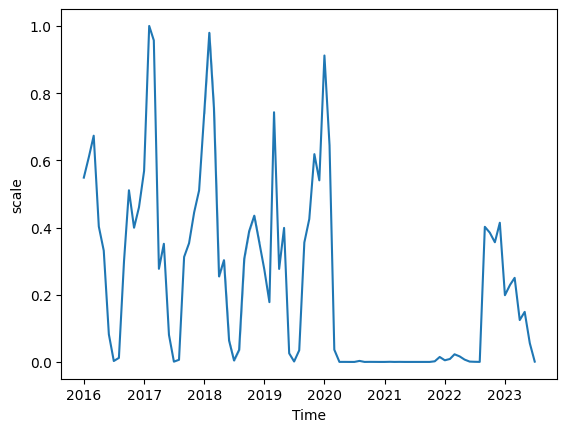

In [47]:
sns.lineplot(x=flu['Time'],y=flu['scale'])

<Axes: xlabel='Time', ylabel='scale'>

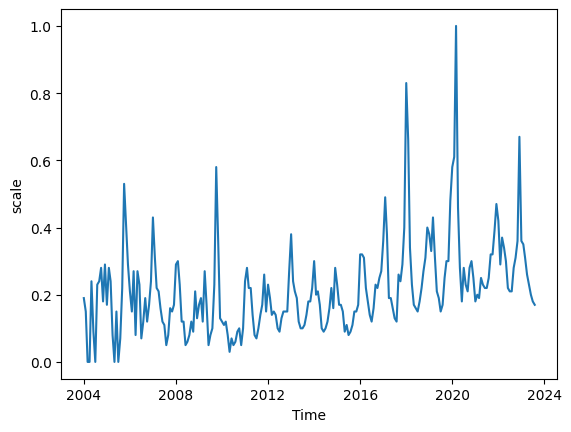

In [48]:
sns.lineplot(x=df['Time'],y=df['scale'])

In [49]:
flu['Time']

22     2019-01-01
55     2019-02-01
88     2019-03-01
121    2019-04-01
154    2019-05-01
          ...    
3256   2017-08-01
3289   2017-09-01
3322   2017-10-01
3355   2017-11-01
3388   2017-12-01
Name: Time, Length: 103, dtype: datetime64[ns]

In [50]:
df['Time']

0     2004-01-01
1     2004-02-01
2     2004-03-01
3     2004-04-01
4     2004-05-01
         ...    
231   2023-04-01
232   2023-05-01
233   2023-06-01
234   2023-07-01
235   2023-08-01
Name: Time, Length: 236, dtype: datetime64[ns]

In [51]:
flu['Time'].min()

Timestamp('2016-01-01 00:00:00')

In [52]:
df = df.loc[df['Time']>=flu['Time'].min()]

In [53]:
datetime(year=2020, month=1, day=1)

datetime.datetime(2020, 1, 1, 0, 0)

<Axes: xlabel='Time', ylabel='scale'>

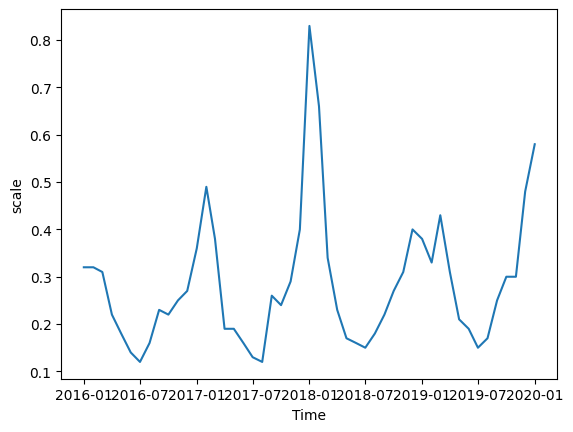

In [54]:
sns.lineplot(x=df.loc[df['Time']<= datetime(year=2020, month=1, day=1)]['Time'],y=df.loc[df['Time']<= datetime(year=2020, month=1, day=1)]['scale'])

<Axes: xlabel='Time', ylabel='scale'>

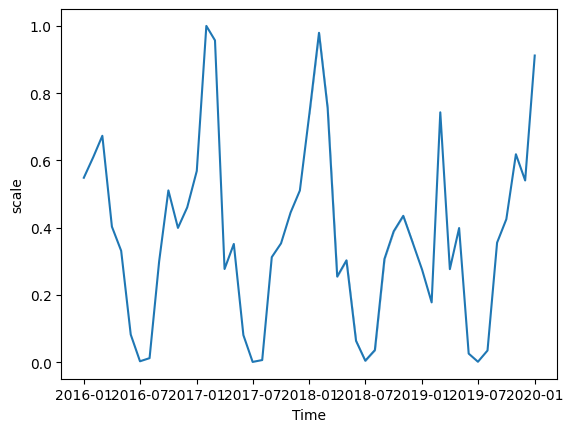

In [55]:
sns.lineplot(x=flu.loc[flu['Time']<= datetime(year=2020, month=1, day=1)]['Time'],y=flu.loc[flu['Time']<= datetime(year=2020, month=1, day=1)]['scale'])

In [56]:
import scipy

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [59]:
flu.rename(columns={'scale':'flu'},inplace=True)

In [62]:
df.rename(columns={'scale':'google'},inplace=True)

In [66]:
dff = pd.DataFrame()

In [65]:
flu.set_index('Time')['flu']

Time
2019-01-01    0.275173
2019-02-01    0.177893
2019-03-01    0.743055
2019-04-01    0.276733
2019-05-01    0.398869
                ...   
2017-08-01    0.006336
2017-09-01    0.312409
2017-10-01    0.353348
2017-11-01    0.445170
2017-12-01    0.510479
Name: flu, Length: 103, dtype: float64

In [67]:
dff['flu'] = flu.set_index('Time')['flu'] 

In [68]:
dff['google'] = df.set_index('Time')['google']

In [69]:
dff

,flu,google
Time,,
2019-01-01,0.275173,0.38
2019-02-01,0.177893,0.33
2019-03-01,0.743055,0.43
2019-04-01,0.276733,0.31
2019-05-01,0.398869,0.21
...,...,...
2017-08-01,0.006336,0.12
2017-09-01,0.312409,0.26
2017-10-01,0.353348,0.24


In [72]:
F = dff.flu
G = dff.google

In [73]:
formula = "F ~ C(G)"
lm = ols(formula, dff).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     3.285
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           1.30e-05
Time:                        16:32:05   Log-Likelihood:                 44.399
No. Observations:                 103   AIC:                            -6.797
Df Residuals:                      62   BIC:                             101.2
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [75]:
dff.to_csv('google_v_flu.csv')